In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./mnist.ipynb
./mnist_test.csv
./mnist_train.csv
./.ipynb_checkpoints\mnist-checkpoint.ipynb


In [2]:
train_df = pd.read_csv('./mnist_train.csv', header = None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('./mnist_test.csv', header = None)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(60000, 785)

In [5]:
X_train = train_df.drop([0], axis=1)
y_train = train_df[0]

In [6]:
X_test = test_df.drop([0], axis=1)
y_test = test_df[0]

In [7]:
X_train.shape

(60000, 784)

In [8]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

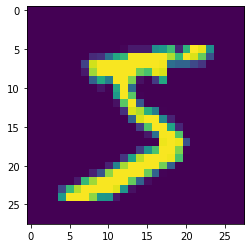

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0][:,:,0])

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [12]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [13]:
input_size = 784
output_size = 10
hidden_layer_size = 200

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(500, activation='tanh'),
                            tf.keras.layers.Dense(200, activation='tanh'),
                            tf.keras.layers.Dense(200, activation='relu'),   
                            tf.keras.layers.Dense(output_size, activation='softmax')   
                            ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 534,910
Trainable params: 534,910
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
NUM_EPOCHS = 100

model.fit(X_train,y_train, batch_size=10000, epochs = NUM_EPOCHS, validation_data=(X_test,y_test), verbose=2)

Epoch 1/100
6/6 - 2s - loss: 1.5818 - accuracy: 0.5922 - val_loss: 0.7990 - val_accuracy: 0.8245 - 2s/epoch - 311ms/step
Epoch 2/100
6/6 - 1s - loss: 0.6261 - accuracy: 0.8400 - val_loss: 0.4344 - val_accuracy: 0.8803 - 1s/epoch - 171ms/step
Epoch 3/100
6/6 - 1s - loss: 0.4014 - accuracy: 0.8819 - val_loss: 0.3336 - val_accuracy: 0.9003 - 1s/epoch - 179ms/step
Epoch 4/100
6/6 - 1s - loss: 0.3234 - accuracy: 0.9028 - val_loss: 0.2843 - val_accuracy: 0.9162 - 1s/epoch - 168ms/step
Epoch 5/100
6/6 - 1s - loss: 0.2777 - accuracy: 0.9163 - val_loss: 0.2512 - val_accuracy: 0.9244 - 1s/epoch - 170ms/step
Epoch 6/100
6/6 - 1s - loss: 0.2463 - accuracy: 0.9263 - val_loss: 0.2269 - val_accuracy: 0.9312 - 1s/epoch - 167ms/step
Epoch 7/100
6/6 - 1s - loss: 0.2220 - accuracy: 0.9334 - val_loss: 0.2082 - val_accuracy: 0.9377 - 1s/epoch - 167ms/step
Epoch 8/100
6/6 - 1s - loss: 0.2024 - accuracy: 0.9396 - val_loss: 0.1922 - val_accuracy: 0.9432 - 978ms/epoch - 163ms/step
Epoch 9/100
6/6 - 1s - loss: 

Epoch 68/100
6/6 - 1s - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.0682 - val_accuracy: 0.9792 - 987ms/epoch - 165ms/step
Epoch 69/100
6/6 - 1s - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.0682 - val_accuracy: 0.9792 - 974ms/epoch - 162ms/step
Epoch 70/100
6/6 - 1s - loss: 0.0078 - accuracy: 0.9995 - val_loss: 0.0683 - val_accuracy: 0.9787 - 986ms/epoch - 164ms/step
Epoch 71/100
6/6 - 1s - loss: 0.0074 - accuracy: 0.9996 - val_loss: 0.0681 - val_accuracy: 0.9795 - 988ms/epoch - 165ms/step
Epoch 72/100
6/6 - 1s - loss: 0.0071 - accuracy: 0.9996 - val_loss: 0.0695 - val_accuracy: 0.9790 - 987ms/epoch - 165ms/step
Epoch 73/100
6/6 - 1s - loss: 0.0068 - accuracy: 0.9997 - val_loss: 0.0692 - val_accuracy: 0.9794 - 990ms/epoch - 165ms/step
Epoch 74/100
6/6 - 1s - loss: 0.0065 - accuracy: 0.9997 - val_loss: 0.0693 - val_accuracy: 0.9792 - 982ms/epoch - 164ms/step
Epoch 75/100
6/6 - 1s - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.0697 - val_accuracy: 0.9792 - 972ms/epoch - 162ms/step


In [17]:
y_predict = model.predict(X_test)

In [18]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
    
accuracy = metrics.accuracy_score(np.argmax(y_test,axis = 1) ,y_pred)
recall = metrics.recall_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
precision = metrics.precision_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
f1_score = metrics.f1_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
cm = metrics.confusion_matrix(np.argmax(y_test,axis = 1) ,y_pred)
print(cm)
print("Accuracy:",accuracy)
print("F1 score:",f1_score)
print("Recall:",recall)
print("Precision:",precision)

[[ 970    0    2    1    1    1    2    1    2    0]
 [   0 1125    2    2    0    1    2    1    2    0]
 [   3    1 1009    1    1    1    3    6    6    1]
 [   0    0    4  992    1    4    0    3    3    3]
 [   1    1    4    1  958    2    4    2    0    9]
 [   2    0    0   11    1  863    7    1    5    2]
 [   4    2    1    1    3    3  943    0    1    0]
 [   2    3    7    0    2    0    0 1004    3    7]
 [   3    0    3    6    2    3    2    3  949    3]
 [   2    2    0    4    8    1    0    4    2  986]]
Accuracy: 0.9799
F1 score: 0.9797007077933879
Recall: 0.9796459491444922
Precision: 0.9797756193348794


In [24]:
print(y_predict)

[[2.0565690e-07 2.1230742e-09 8.0920806e-08 ... 9.9999142e-01
  1.2735329e-07 1.8363471e-06]
 [2.0940069e-10 1.4945740e-06 9.9999833e-01 ... 6.0203090e-13
  5.1533946e-09 7.5467498e-14]
 [2.2194332e-08 9.9995172e-01 2.9003515e-06 ... 1.2702670e-05
  3.1207986e-05 1.5652677e-07]
 ...
 [4.5512964e-13 1.0242415e-11 4.1352880e-12 ... 1.4074355e-07
  6.7173422e-09 7.6827540e-08]
 [2.8338842e-11 3.5637482e-10 1.4655229e-09 ... 3.2153580e-09
  6.4917558e-06 2.4855882e-13]
 [1.1245310e-09 4.1014375e-10 4.3314175e-11 ... 6.6690705e-14
  9.2660095e-11 5.8724130e-11]]
